In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [384]:
m=0.8 
c=0.0 
L=0.00005
epoch=30
epoch_error_list=[]
epoch_count_list=[]

In [385]:
noise =np.random.normal(1,10,100)

In [386]:
noise

array([-20.40903925,  10.0213531 ,  -2.48504106,  -4.49779194,
        -2.07922551,  -6.48220921,  12.60043609,   4.48205232,
         5.16951062,  -2.37041457,  -5.18755346,  -2.82099922,
         5.97192973,   2.53663077,   9.47398512,   0.71183464,
        -7.45767246,  -2.69152331, -17.01503551,  -7.12295531,
         2.51418958,  -1.8462478 , -15.59736487,  17.68290458,
         1.11880825,   1.62559417,  -0.63673393,  14.17173893,
         2.59398462,  -2.59649551,  -2.26464013, -13.06334184,
        -1.98457943,  15.34235852,   6.62784449,  13.41396268,
         1.95928463,   8.79574224,  14.61545386, -12.96116799,
         8.38661899,  -9.25706824,   0.26922705,  -5.72113411,
         7.11660765,  10.10261387,  17.34763197,   4.17941666,
         5.34389866,   3.2237877 ,   2.43817927,   3.06048518,
        -7.6971881 , -18.27692643,  12.01407382,   2.51521349,
        10.93729845,   8.00423614,  -7.74120625,   1.11308692,
         1.8406481 ,   0.33258641,  13.21705997,   9.25

In [387]:
X=np.random.uniform(5,150,100)
y=m*X+c
Y=y+noise

N=float(len(X))

In [388]:
X

array([ 59.20482153,  70.85598819, 111.81695038,  44.38517117,
        51.99498698,  50.29820088,  10.95332785, 149.20440722,
        50.43786453,  62.47322438, 108.42486812,  12.06475565,
        30.61516907, 141.20392994, 127.33699084, 134.93315438,
       115.35782453,  61.68006153,  86.2648063 , 143.1773526 ,
        46.26641802,  38.96655911, 143.69754279,  67.99154561,
        86.18513607,  71.6510657 , 108.45965491,  62.59136808,
        41.1457731 , 121.15172541,  57.66487645,  93.90554169,
        85.05008341, 134.6440586 ,  10.11157064, 102.79635138,
        49.05976098, 143.94895058,  91.4129976 ,  63.04294678,
       115.98959909,  64.33572912, 132.62594274,  56.26664637,
       142.83013667,  49.89032132, 128.65904818,  84.66849906,
        57.929559  , 115.1486492 ,  37.25976009,  88.16762112,
        62.1172352 ,   8.56953947,  14.52807366, 115.16399942,
        17.5104448 ,  96.10987765,  34.22044468,  94.69146002,
       125.40167418, 124.75270976,  72.0404459 , 114.57

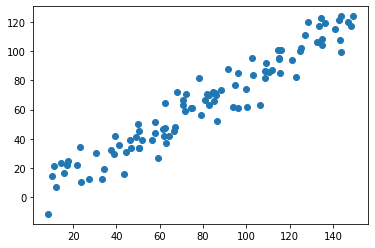

In [389]:
plt.scatter(X,Y)

In [390]:
def mse(N,Y,Y_hat):
  return (1/N)*sum(Y-Y_hat)**2

In [391]:
def gradient_descent_fit(m,c,N,L):
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):
    Y_hat = m*X+c
    
    
    epoch_count_list=epoch_count_list[:]
    epoch_count_list.append(i)
    epoch_error=mse(N,Y,Y_hat)
    
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)

   
    D_m=(-2/N)*sum(X*(Y-Y_hat))
    
    D_c=(-2/N)*sum(Y-Y_hat)
    
   
    m=m-(L * D_m)
   
    c=c-(L * D_c)
  
  print(" m is: ",m," and  c is: ",c)
  return Y_hat,epoch_count_list,epoch_error_list


In [392]:

returned_params=gradient_descent_fit(m,c,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]

 m is:  0.8053093383739741  and  c is:  -3.632060807756454e-05


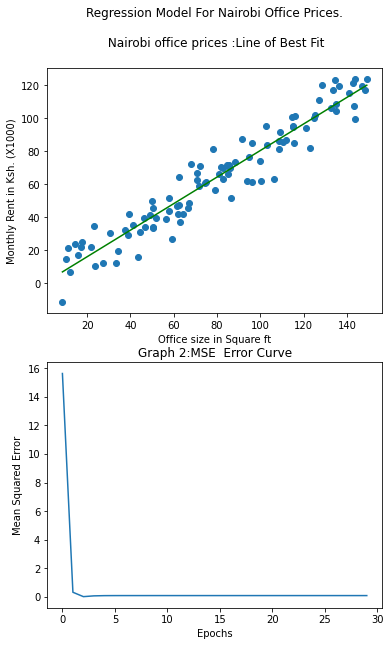

In [393]:

fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Square ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Nairobi office prices :Line of Best Fit\n")
ax1.scatter(X,Y)

ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='green')
ax2.set_title("Graph 2:MSE  Error Curve")
ax2.set(xlabel="Epochs")
ax2.set(ylabel="Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)


epoch_count_list.clear()
epoch_error_list.clear()

In [394]:
y_predicted